In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":48.18,"feels_like":41.36,"temp_min":44.01,"temp_max":52,"pressure":1027,"humidity":61},"visibility":10000,"wind":{"speed":6.71,"deg":184,"gust":15.41},"clouds":{"all":1},"dt":1616457361,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616409817,"sunset":1616453901},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 48.18,
  'feels_like': 41.36,
  'temp_min': 44.01,
  'temp_max': 52,
  'pressure': 1027,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 6.71, 'deg': 184, 'gust': 15.41},
 'clouds': {'all': 1},
 'dt': 1616457361,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616409817,
  'sunset': 1616453901},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [17]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8f95288aff6efbb2bc949446d3faefe9&q=Bston


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 48.18,
  'feels_like': 41.36,
  'temp_min': 44.01,
  'temp_max': 52,
  'pressure': 1027,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 6.71, 'deg': 184, 'gust': 15.41},
 'clouds': {'all': 1},
 'dt': 1616457361,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616409817,
  'sunset': 1616453901},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1616457361

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 52 61 1 6.71


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-22 23:56:01'

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | ixtapa
Processing Record 3 of Set 13 | buraydah
Processing Record 4 of Set 13 | adre
Processing Record 5 of Set 13 | bosaso
Processing Record 6 of Set 13 | port alfred
Processing Record 7 of Set 13 | castro
Processing Record 8 of Set 13 | butaritari
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | thompson
Processing Record 11 of Set 13 | vaini
Processing Record 12 of Set 13 | san cristobal
Processing Record 13 of Set 13 | namatanai
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | mataura
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | punta arenas
Processing Record 18 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 13 | esperance
Processing Record 20 of Set 13 | atuona
Processing Record 21 of Set 13 | new norfolk
Processing Record 22 of Set 13 | ni

Processing Record 35 of Set 16 | yurimaguas
Processing Record 36 of Set 16 | narsaq
Processing Record 37 of Set 16 | mayumba
Processing Record 38 of Set 16 | cobh
Processing Record 39 of Set 16 | tabuk
Processing Record 40 of Set 16 | takoradi
Processing Record 41 of Set 16 | kungurtug
Processing Record 42 of Set 16 | biograd na moru
Processing Record 43 of Set 16 | balrampur
Processing Record 44 of Set 16 | guasdualito
Processing Record 45 of Set 16 | pokhara
Processing Record 46 of Set 16 | port-gentil
Processing Record 47 of Set 16 | frome
Processing Record 48 of Set 16 | silyanah
City not found. Skipping...
Processing Record 49 of Set 16 | arraial do cabo
Processing Record 50 of Set 16 | sovetskiy
Processing Record 1 of Set 17 | saint-georges
Processing Record 2 of Set 17 | vestmannaeyjar
Processing Record 3 of Set 17 | kochubey
Processing Record 4 of Set 17 | nanortalik
Processing Record 5 of Set 17 | podor
Processing Record 6 of Set 17 | salalah
Processing Record 7 of Set 17 | kl

Processing Record 19 of Set 20 | prado
Processing Record 20 of Set 20 | okato
Processing Record 21 of Set 20 | shimoda
Processing Record 22 of Set 20 | kalmunai
Processing Record 23 of Set 20 | saleaula
City not found. Skipping...
Processing Record 24 of Set 20 | padang
Processing Record 25 of Set 20 | saint-pierre
Processing Record 26 of Set 20 | ulladulla
Processing Record 27 of Set 20 | saurimo
Processing Record 28 of Set 20 | leshukonskoye
Processing Record 29 of Set 20 | maykop
Processing Record 30 of Set 20 | sioux lookout
Processing Record 31 of Set 20 | impfondo
Processing Record 32 of Set 20 | komsomolskiy
Processing Record 33 of Set 20 | alenquer
Processing Record 34 of Set 20 | meulaboh
Processing Record 35 of Set 20 | eagle
Processing Record 36 of Set 20 | aksu
Processing Record 37 of Set 20 | shu
Processing Record 38 of Set 20 | dongsheng
Processing Record 39 of Set 20 | cabo san lucas
Processing Record 40 of Set 20 | pak chong
Processing Record 41 of Set 20 | paamiut
Proc

Processing Record 9 of Set 24 | westport
Processing Record 10 of Set 24 | atambua
Processing Record 11 of Set 24 | alice springs
Processing Record 12 of Set 24 | kirkenes
Processing Record 13 of Set 24 | xiongzhou
Processing Record 14 of Set 24 | were ilu
Processing Record 15 of Set 24 | barawe
City not found. Skipping...
Processing Record 16 of Set 24 | rome
Processing Record 17 of Set 24 | sorong
Processing Record 18 of Set 24 | la asuncion
Processing Record 19 of Set 24 | lubu
Processing Record 20 of Set 24 | mogapinyana
Processing Record 21 of Set 24 | boromo
Processing Record 22 of Set 24 | saryozek
Processing Record 23 of Set 24 | fushun
Processing Record 24 of Set 24 | noyabrsk
Processing Record 25 of Set 24 | tancanhuitz
Processing Record 26 of Set 24 | aguimes
Processing Record 27 of Set 24 | havoysund
Processing Record 28 of Set 24 | don sak
Processing Record 29 of Set 24 | zhirnovsk
Processing Record 30 of Set 24 | auki
Processing Record 31 of Set 24 | moirang
Processing Rec

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.00,76,0,10.00,ZA,2021-03-23 00:01:01
1,Ixtapa,20.7000,-105.2000,77.00,61,20,16.11,MX,2021-03-22 23:56:30
2,Buraydah,26.3260,43.9750,71.60,33,0,4.61,SA,2021-03-23 00:01:01
3,Adre,13.4667,22.2000,81.43,20,83,3.96,TD,2021-03-23 00:01:02
4,Bosaso,11.2842,49.1816,75.67,49,1,4.97,SO,2021-03-23 00:01:02
5,Port Alfred,-33.5906,26.8910,65.53,79,43,6.58,ZA,2021-03-23 00:01:03
6,Castro,-24.7911,-50.0119,65.10,89,92,0.94,BR,2021-03-23 00:01:03
7,Butaritari,3.0707,172.7902,80.92,80,96,18.59,KI,2021-03-23 00:01:04
8,Busselton,-33.6500,115.3333,55.99,84,40,1.01,AU,2021-03-23 00:01:04
9,Thompson,55.7435,-97.8558,23.00,63,75,11.50,CA,2021-03-23 00:01:05


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [31]:
city_data_df =city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-03-23 00:01:01,-34.4187,19.2345,66.00,76,0,10.00
1,Ixtapa,MX,2021-03-22 23:56:30,20.7000,-105.2000,77.00,61,20,16.11
2,Buraydah,SA,2021-03-23 00:01:01,26.3260,43.9750,71.60,33,0,4.61
3,Adre,TD,2021-03-23 00:01:02,13.4667,22.2000,81.43,20,83,3.96
4,Bosaso,SO,2021-03-23 00:01:02,11.2842,49.1816,75.67,49,1,4.97
5,Port Alfred,ZA,2021-03-23 00:01:03,-33.5906,26.8910,65.53,79,43,6.58
6,Castro,BR,2021-03-23 00:01:03,-24.7911,-50.0119,65.10,89,92,0.94
7,Butaritari,KI,2021-03-23 00:01:04,3.0707,172.7902,80.92,80,96,18.59
8,Busselton,AU,2021-03-23 00:01:04,-33.6500,115.3333,55.99,84,40,1.01
9,Thompson,CA,2021-03-23 00:01:05,55.7435,-97.8558,23.00,63,75,11.50


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

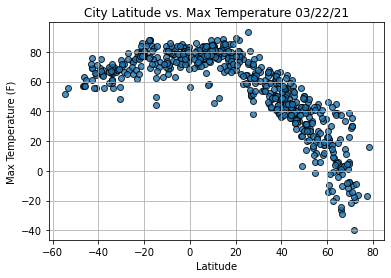

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

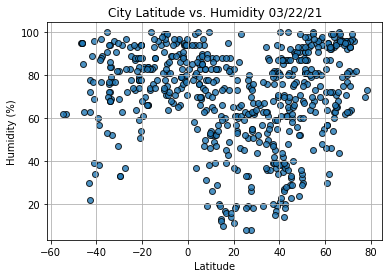

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

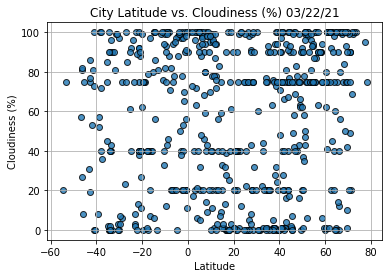

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

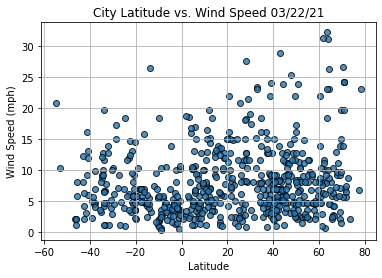

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
 

In [50]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-03-23 00:01:06
Lat                      -23.1203
Lng                      -134.969
Max Temp                    80.17
Humidity                       73
Cloudiness                      3
Wind Speed                   11.9
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
594     True
595     True
596     True
597    False
598     True
Name: Lat, Length: 599, dtype: bool

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ixtapa,MX,2021-03-22 23:56:30,20.7000,-105.2000,77.00,61,20,16.11
2,Buraydah,SA,2021-03-23 00:01:01,26.3260,43.9750,71.60,33,0,4.61
3,Adre,TD,2021-03-23 00:01:02,13.4667,22.2000,81.43,20,83,3.96
4,Bosaso,SO,2021-03-23 00:01:02,11.2842,49.1816,75.67,49,1,4.97
7,Butaritari,KI,2021-03-23 00:01:04,3.0707,172.7902,80.92,80,96,18.59


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

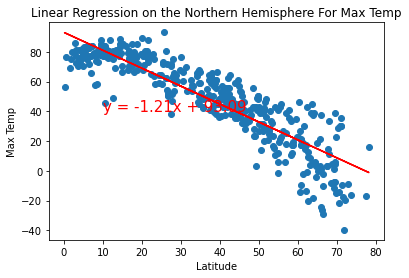

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


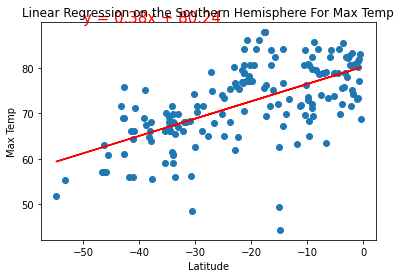

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Max Temp")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

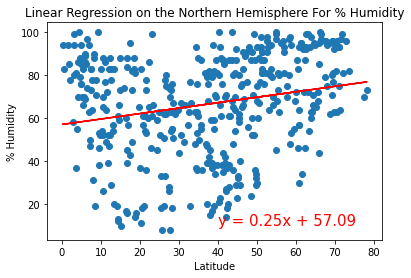

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

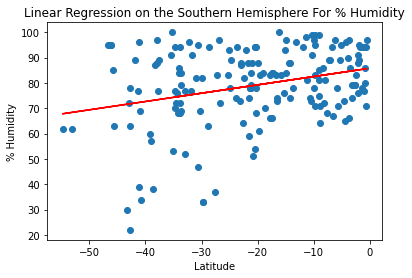

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Humidity")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

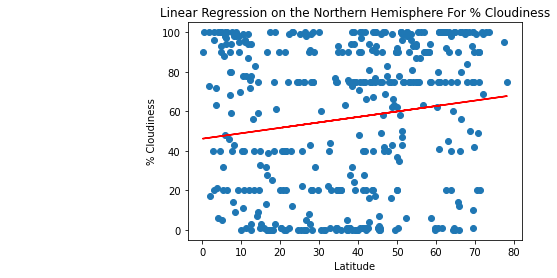

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

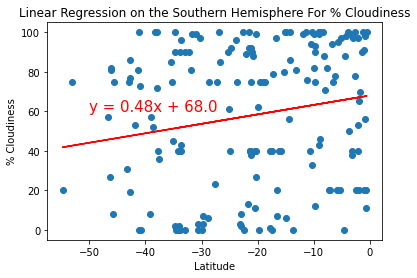

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For % Cloudiness")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

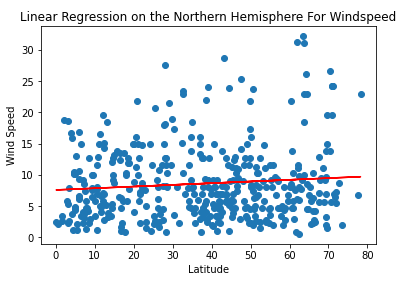

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

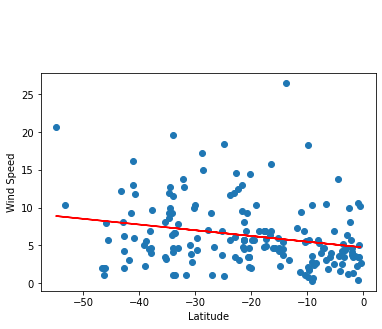

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere For Windspeed")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))